In [220]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.gridspec as gridspec
from numpy import random
import scipy.stats as scipy

In [221]:
from IPython.display import display


In [222]:
from sklearn.metrics import accuracy_score

with sqlite3.connect('C:/Users/Thoma/OneDrive/Desktop/database.sqlite') as con:
    countries = pd.read_sql_query("SELECT * from Country", con)
    matches = pd.read_sql_query("SELECT * from Match", con)
    leagues = pd.read_sql_query("SELECT * from League", con)
    teams = pd.read_sql_query("SELECT * from Team", con)
    tempmatch = pd.read_sql_query("SELECT * from Match", con)
    matches3 = matches2 = matches

In [9]:
matches.tail()
#matches.describe()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25978,25979,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992095,10192,9931,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [11]:
leagues


,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [12]:
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [13]:
main_countries = ['Scotland']
countries = countries[countries.name.isin(main_countries)]
leagues = countries.merge(leagues,on='id',suffixes=('', '_y'))
seasons = matches.season.unique()
leagues

,id,name,country_id,name_y
0,19694,Scotland,19694,Scotland Premier League


In [14]:
req_matches = matches[matches.league_id.isin(leagues['id'])]
req_matches = req_matches[['id','league_id','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal','season']]
req_matches["total_goals"] = req_matches['home_team_goal'] + req_matches['away_team_goal']
req_matches.dropna(inplace=True)
req_matches.head()

,id,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals
19693,19694,19694,8596,8548,0,1,2008/2009,1
19694,19695,19694,9860,9927,3,2,2008/2009,5
19695,19696,19694,8597,10251,1,0,2008/2009,1
19696,19697,19694,8485,8066,0,2,2008/2009,2
19697,19698,19694,9925,9800,1,0,2008/2009,1


In [15]:
def res(row):
    if row['home_team_goal'] == row['away_team_goal']:
        val = 0
    elif row['home_team_goal'] > row['away_team_goal']:
        val = 1
    else:
        val = -1
    return val

req_matches["result"] = req_matches.apply(res,axis = 1)
req_matches.head()

,id,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result
19693,19694,19694,8596,8548,0,1,2008/2009,1,-1
19694,19695,19694,9860,9927,3,2,2008/2009,5,1
19695,19696,19694,8597,10251,1,0,2008/2009,1,1
19696,19697,19694,8485,8066,0,2,2008/2009,2,-1
19697,19698,19694,9925,9800,1,0,2008/2009,1,1


In [17]:
new_matches = pd.merge(req_matches,leagues,left_on='league_id', right_on='id')
new_matches = new_matches.drop(['id_x','id_y','country_id'],axis = 1)
scottish = new_matches[new_matches.name == "Scotland"]

display(scottish.tail())

,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,name,name_y
1819,19694,8284,8649,3,3,2015/2016,6,0,Scotland,Scotland Premier League
1820,19694,8066,8485,2,1,2015/2016,3,1,Scotland,Scotland Premier League
1821,19694,8597,8429,1,2,2015/2016,3,-1,Scotland,Scotland Premier League
1822,19694,9927,8426,2,1,2015/2016,3,1,Scotland,Scotland Premier League
1823,19694,8467,9938,2,1,2015/2016,3,1,Scotland,Scotland Premier League


In [18]:
s = scottish.groupby('season')

seasons

display(s.tail(2))


,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,name,name_y
226,19694,8596,8485,0,1,2008/2009,1,-1,Scotland,Scotland Premier League
227,19694,8429,9800,1,2,2008/2009,3,-1,Scotland,Scotland Premier League
454,19694,9800,9927,3,3,2009/2010,6,0,Scotland,Scotland Premier League
455,19694,8548,10251,1,1,2009/2010,2,0,Scotland,Scotland Premier League
682,19694,8485,10251,4,2,2010/2011,6,1,Scotland,Scotland Premier League
683,19694,8429,8467,1,2,2010/2011,3,-1,Scotland,Scotland Premier League
910,19694,8467,9860,2,0,2011/2012,2,1,Scotland,Scotland Premier League
911,19694,9800,8597,3,0,2011/2012,3,1,Scotland,Scotland Premier League
1138,19694,9927,9938,0,1,2012/2013,1,-1,Scotland,Scotland Premier League
1139,19694,8467,9800,2,1,2012/2013,3,1,Scotland,Scotland Premier League


array(['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013',
       '2013/2014', '2014/2015', '2015/2016'], dtype=object)

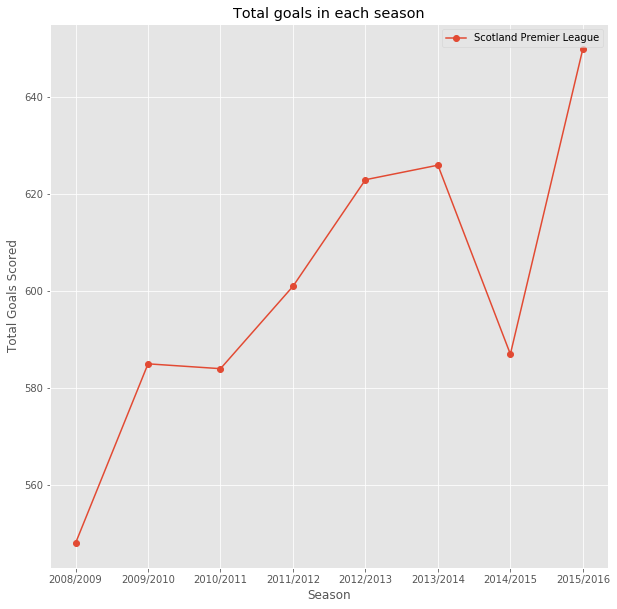

In [21]:
fig = plt.figure(figsize=(10, 10))
plt.title("Total goals in each season")
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.xlabel("Season")
plt.ylabel("Total Goals Scored")
num_seasons = range(len(seasons))

plt.plot(num_seasons,s.total_goals.sum().values,label = "Scotland Premier League", marker = 'o')
plt.legend()
seasons

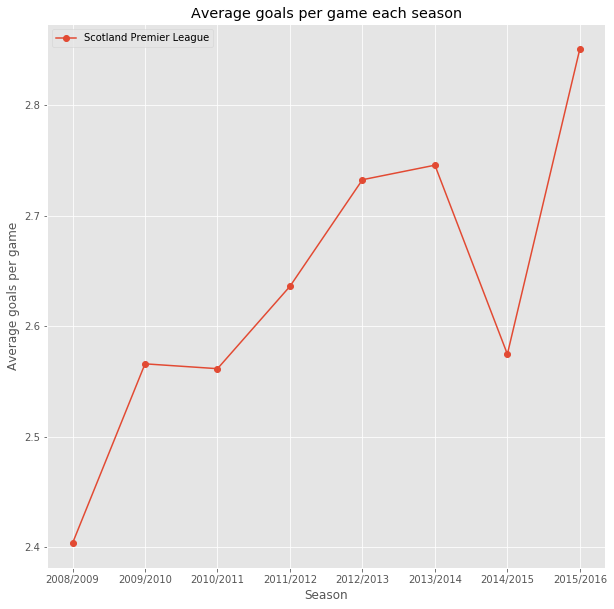

In [22]:
#Plotting average goals scored each season
fig = plt.figure(figsize=(10, 10))
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.xlabel("Season")
plt.title("Average goals per game each season")
plt.ylabel("Average goals per game")

plt.plot(num_seasons,s.total_goals.mean().values,label = "Scotland Premier League", marker = 'o')
plt.legend(loc = 2)

In [24]:
average_goals_scottish = scottish.total_goals.mean()
print("{:.2}".format(average_goals_scottish))

2.6


In [25]:
#Merging Home team and matches

matches_h_teams = pd.merge(new_matches,teams,left_on='home_team_api_id', right_on='team_api_id')
matches_h_teams = matches_h_teams.drop(['id','team_api_id','team_fifa_api_id'],axis = 1)
matches_h_teams = matches_h_teams.rename(columns={'team_long_name':'home_team_long_name','name_y':'league_name','name':'country_name'})
matches_h_teams.head()

,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,country_name,league_name,home_team_long_name,team_short_name
0,19694,8596,8548,0,1,2008/2009,1,-1,Scotland,Scotland Premier League,Falkirk,FAL
1,19694,8596,9938,0,0,2008/2009,0,0,Scotland,Scotland Premier League,Falkirk,FAL
2,19694,8596,9927,1,0,2008/2009,1,1,Scotland,Scotland Premier League,Falkirk,FAL
3,19694,8596,10251,1,1,2008/2009,2,0,Scotland,Scotland Premier League,Falkirk,FAL
4,19694,8596,9800,1,2,2008/2009,3,-1,Scotland,Scotland Premier League,Falkirk,FAL


Text(0.5, 0, 'Team name')

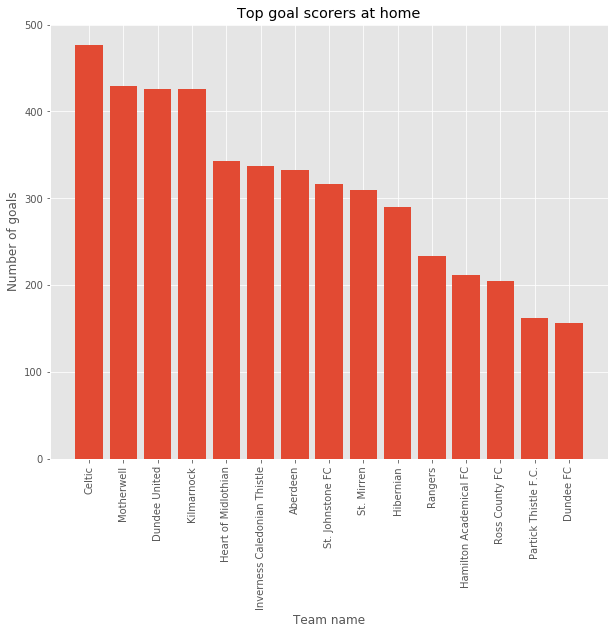

In [26]:
top_goal_scorers_home = matches_h_teams.groupby('home_team_long_name').total_goals.sum().sort_values(ascending = False)
top_goal_scorers_home.head(15)
%matplotlib inline 
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1)
rects = ax.bar(range(15), top_goal_scorers_home.head(15).values,align = "center")
ax.set_xticks(range(15))
ax.set_xticklabels(top_goal_scorers_home.head(15).index,rotation = "vertical")
ax.set_title("Top goal scorers at home")
ax.set_ylabel("Number of goals")
ax.set_xlabel("Team name")

In [27]:
#Merging Away team and matches

matches_a_teams = pd.merge(new_matches,teams,left_on='away_team_api_id', right_on='team_api_id')
matches_a_teams = matches_a_teams.drop(['id','team_api_id','team_fifa_api_id'],axis = 1)
matches_a_teams = matches_a_teams.rename(columns={'team_long_name':'away_team_long_name','name_y':'league_name','name':'country_name'})
matches_a_teams.head()

,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,country_name,league_name,away_team_long_name,team_short_name
0,19694,8596,8548,0,1,2008/2009,1,-1,Scotland,Scotland Premier League,Rangers,RAN
1,19694,8429,8548,1,3,2008/2009,4,-1,Scotland,Scotland Premier League,Rangers,RAN
2,19694,8597,8548,0,4,2008/2009,4,-1,Scotland,Scotland Premier League,Rangers,RAN
3,19694,9927,8548,0,0,2008/2009,0,0,Scotland,Scotland Premier League,Rangers,RAN
4,19694,9860,8548,2,1,2008/2009,3,1,Scotland,Scotland Premier League,Rangers,RAN


Text(0.5, 0, 'Team name')

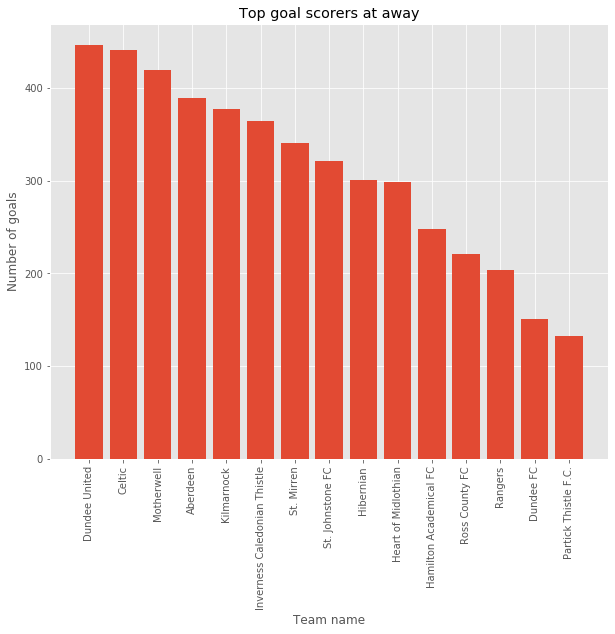

In [29]:
top_goal_scorers_away = matches_a_teams.groupby('away_team_long_name').total_goals.sum().sort_values(ascending = False)
top_goal_scorers_away.head(15)
%matplotlib inline 
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1)
rects = ax.bar(range(15), top_goal_scorers_away.head(15).values,align = "center")
ax.set_xticks(range(15))
ax.set_xticklabels(top_goal_scorers_away.head(15).index,rotation = "vertical")
ax.set_title("Top goal scorers at away")
ax.set_ylabel("Number of goals")
ax.set_xlabel("Team name")

In [30]:
#select fields
matches = matches3[matches3.league_id.isin(leagues.id)]
matches = matches[['id', 'country_id' ,'league_id', 'season', 'stage', 'date','match_api_id', 'home_team_api_id', 'away_team_api_id','B365H', 'B365D' ,'B365A']]
matches.dropna(inplace=True)
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,B365H,B365D,B365A
19693,19694,19694,19694,2008/2009,1,2008-08-09 00:00:00,489981,8596,8548,6.50,4.00,1.50
19694,19695,19694,19694,2008/2009,1,2008-08-09 00:00:00,489982,9860,9927,2.00,3.25,3.25
19695,19696,19694,19694,2008/2009,1,2008-08-09 00:00:00,489983,8597,10251,2.40,3.20,2.62
19696,19697,19694,19694,2008/2009,1,2008-08-09 00:00:00,489984,8485,8066,1.73,3.40,4.20
19697,19698,19694,19694,2008/2009,1,2008-08-10 00:00:00,489985,9925,9800,1.17,6.50,17.00


In [31]:
from scipy.stats import entropy

def match_entropy(row):
    odds = [row['B365H'],row['B365D'],row['B365A']]
    #change odds to probability
    probs = [1/o for o in odds]
    #normalize to sum to 1
    norm = sum(probs)
    probs = [p/norm for p in probs]
    return entropy(probs)

#compute match entropy
matches['entropy'] = matches.apply(match_entropy,axis=1)

In [32]:
#compute mean entropy for every league in every season
entropy_means = matches.groupby(('season','league_id')).entropy.mean()
entropy_means = entropy_means.reset_index().pivot(index='season', columns='league_id', values='entropy')
entropy_means.columns = [leagues[leagues.id==x].name.values[0] for x in entropy_means.columns]
entropy_means.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  


,Scotland
season,
2008/2009,0.989919
2009/2010,0.991430
2010/2011,0.981203
2011/2012,0.992080
2012/2013,1.020779
2013/2014,1.006370
2014/2015,0.993735
2015/2016,0.999148


Text(7.3, 0.952, 'more predictable')

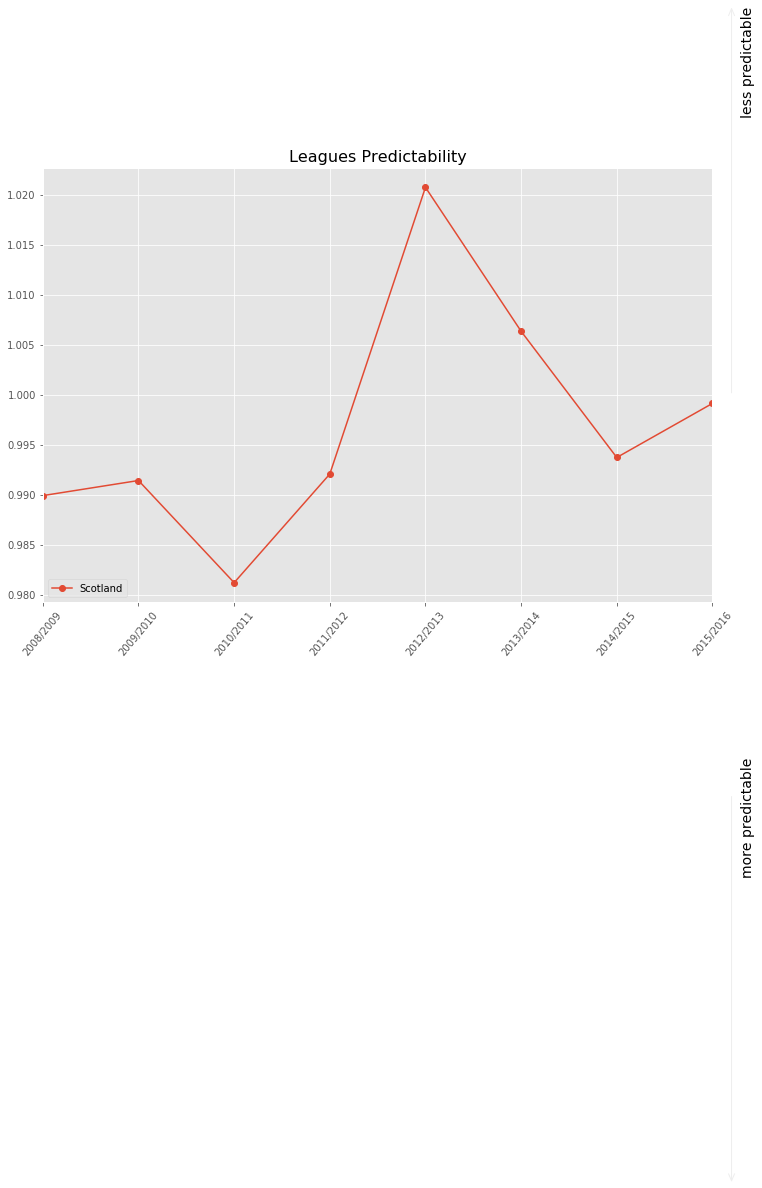

In [33]:
#plot graph
ax = entropy_means.plot(figsize=(12,8),marker='o')

#set title
plt.title('Leagues Predictability', fontsize=16)

#set ticks roatation
plt.xticks(rotation=50)

#keep colors for next graph
colors = [x.get_color() for x in ax.get_lines()]
colors_mapping = dict(zip(leagues.id,colors))

#remove x label
ax.set_xlabel('')

#locate legend 
plt.legend(loc='lower left')

#add arrows
ax.annotate('', xytext=(7.2, 1),xy=(7.2, 1.039),
            arrowprops=dict(facecolor='black',arrowstyle="->, head_length=.7, head_width=.3",linewidth=1), annotation_clip=False)

ax.annotate('', xytext=(7.2, 0.96),xy=(7.2, 0.921),
            arrowprops=dict(facecolor='black',arrowstyle="->, head_length=.7, head_width=.3",linewidth=1), annotation_clip=False)

ax.annotate('less predictable', xy=(7.3, 1.028), annotation_clip=False,fontsize=14,rotation='vertical')
ax.annotate('more predictable', xy=(7.3, 0.952), annotation_clip=False,fontsize=14,rotation='vertical')

#plt.savefig('figures/leagues_pred.png', bbox_inches='tight',dpi=600)

In [34]:

# Considering Scottish Premier League

main_countries = ['Scotland']
countries = countries[countries.name.isin(main_countries)]
leagues = countries.merge(leagues,on='id',suffixes=('', '_y'))
seasons = matches.season.unique()
leagues

,id,name,name_y,country_id,name_y
0,19694,Scotland,Scotland,19694,Scotland Premier League


In [35]:
#Merge the leagues with corresponding matches

req_matches = matches2[matches2.league_id.isin(leagues['id'])]
req_matches = req_matches[['id','league_id','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal','season']]
req_matches["total_goals"] = req_matches['home_team_goal'] + req_matches['away_team_goal']
req_matches["result"] = req_matches.apply(res,axis = 1)
req_matches.dropna(inplace=True)
req_matches.tail()


,id,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result
21512,21513,19694,8284,8649,3,3,2015/2016,6,0
21513,21514,19694,8066,8485,2,1,2015/2016,3,1
21514,21515,19694,8597,8429,1,2,2015/2016,3,-1
21515,21516,19694,9927,8426,2,1,2015/2016,3,1
21516,21517,19694,8467,9938,2,1,2015/2016,3,1


In [36]:
new_matches = pd.merge(req_matches,leagues,left_on='league_id', right_on='id')
new_matches = new_matches.drop(['id_x','id_y','country_id'],axis = 1)
scottish = new_matches[new_matches.name == "Scotland"]

# sum_goals = new_group_matches.home_team_goal.sum()
s = scottish.groupby('season')
seasons
%matplotlib inline

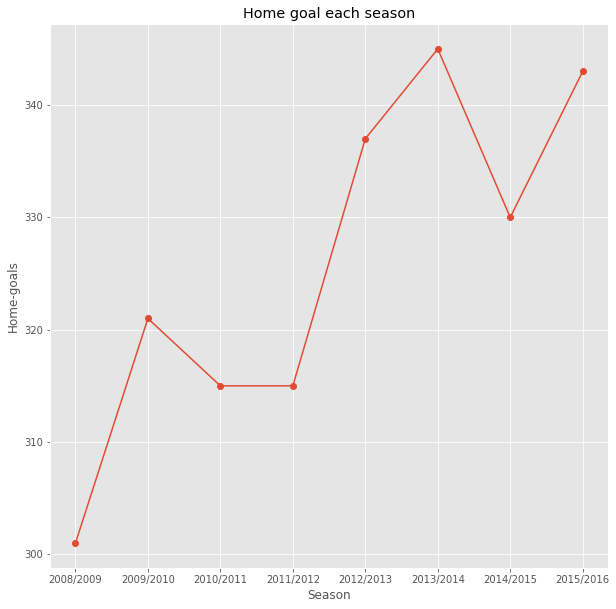

In [38]:
#Plotting home scored each season
fig = plt.figure(figsize=(10, 10))
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.title('Home goal each season')
plt.xlabel('Season')
plt.ylabel('Home-goals')
plt.plot(num_seasons,s.home_team_goal.sum().values,label = "Scotland Premier League", marker = 'o')

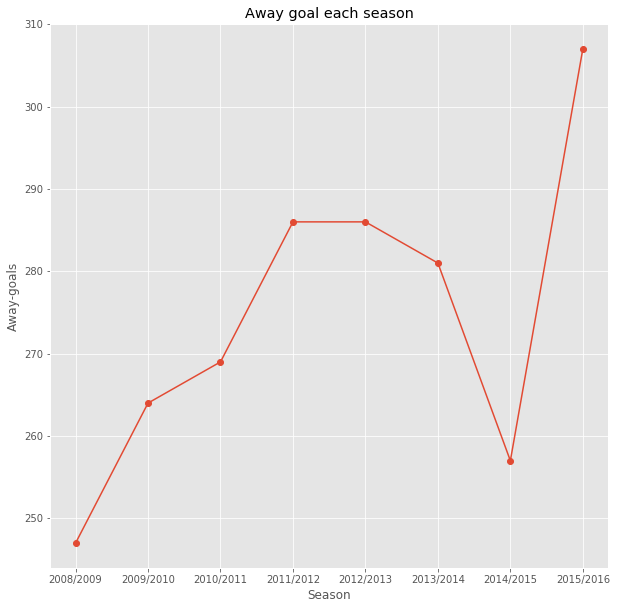

In [40]:
#Plotting away scored each season
fig = plt.figure(figsize=(10, 10))
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.title('Away goal each season')
plt.xlabel('Season')
plt.ylabel('Away-goals')
plt.plot(num_seasons,s.away_team_goal.sum().values,label = "Scotland Premier League", marker = 'o')

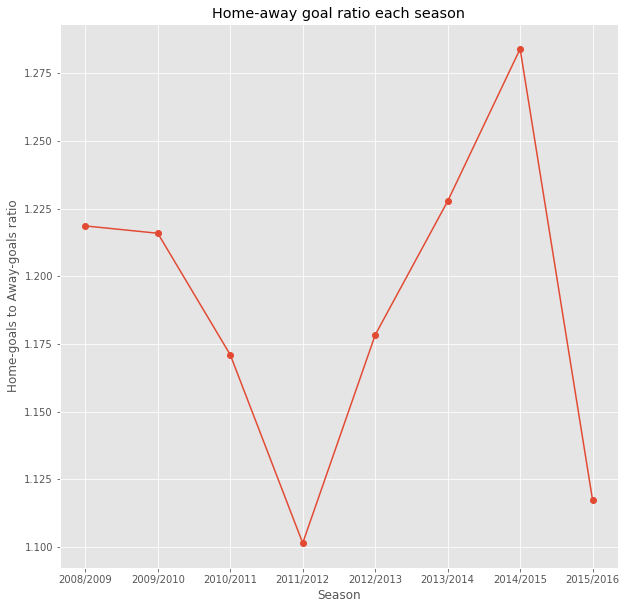

In [41]:
#Plotting home/away scored each season
fig = plt.figure(figsize=(10, 10))
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.title('Home-away goal ratio each season')
plt.xlabel('Season')
plt.ylabel('Home-goals to Away-goals ratio')
plt.plot(num_seasons,s.home_team_goal.sum().values / s.away_team_goal.sum().values,label = "Scotland Premier League", marker = 'o')

array([1.31506849, 1.32394366, 1.10588235, 1.11111111, 1.34848485,
       1.34210526, 1.24390244, 1.12048193])

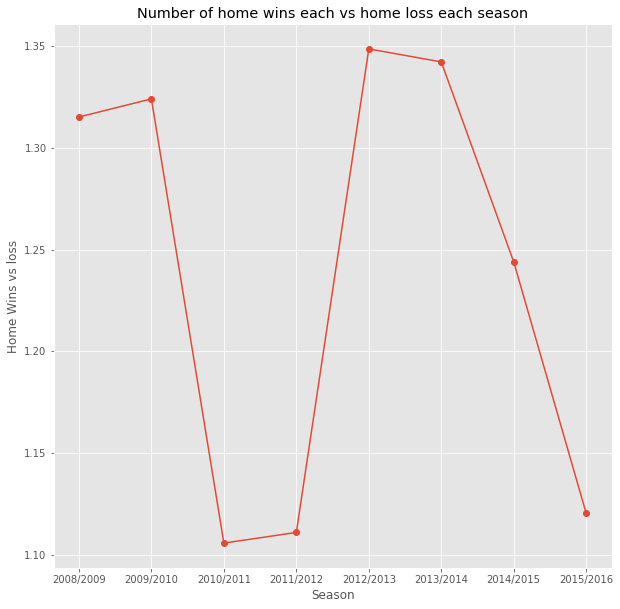

In [42]:
#Subsetting homewins vs homeloss from each of the leagues - ignoring draws.
s_hw = np.true_divide(scottish[scottish.result == 1].groupby('season').result.sum().values,scottish[scottish.result == -1].groupby('season').result.sum().values * -1)


#Plotting number of home wins vs home losses each season
fig = plt.figure(figsize=(10, 10))
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.xlim = (-20,20)
plt.ylim = (0,120)
plt.title("Number of home wins each vs home loss each season")
plt.xlabel("Season")
plt.ylabel("Home Wins vs loss")
plt.plot(num_seasons,s_hw,label = "Scotland Premier League", marker = 'o')
display(s_hw)

In [373]:
# Read data from the CSV into a dataframe

raw_data_1 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/ScottishDatasets/2000-01.csv')
raw_data_2 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/ScottishDatasets/2001-02.csv')
raw_data_3 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/ScottishDatasets/2002-03.csv')
raw_data_4 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/ScottishDatasets/2003-04.csv')
raw_data_5 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/ScottishDatasets/2004-05.csv', encoding = "ISO-8859-1")
raw_data_6 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/ScottishDatasets/2005-06.csv')
raw_data_7 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/ScottishDatasets/2006-07.csv')
raw_data_8 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/ScottishDatasets/2007-08.csv')
raw_data_9 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/ScottishDatasets/2008-09.csv')
raw_data_10 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/ScottishDatasets/2009-10.csv')
raw_data_11 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/ScottishDatasets/2010-11.csv')
raw_data_12 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/ScottishDatasets/2011-12.csv')
raw_data_13 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/ScottishDatasets/2012-13.csv')
raw_data_14 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/ScottishDatasets/2013-14.csv')
raw_data_15 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/ScottishDatasets/2014-15.csv')
raw_data_16 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/ScottishDatasets/2015-16.csv')
raw_data_17 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/ScottishDatasets/2016-17.csv')
raw_data_18 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/ScottishDatasets/2017-18.csv')
raw_data_19 = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/ScottishDatasets/2018-19.csv', encoding = "ISO-8859-1")

In [374]:
# Selecting the features

raw_data_1 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_2 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_3 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_4 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_5 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_6 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_7 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_8 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_9 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_10 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_11 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_12 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_13 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_14 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_15 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_16 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_17 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_18 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_19 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]

In [375]:
# Concating the data on one dataframe

playing_stat = pd.concat([raw_data_1,raw_data_2,raw_data_3,raw_data_4,raw_data_5,raw_data_6,raw_data_7,raw_data_8,raw_data_9,raw_data_10,raw_data_11,raw_data_12,raw_data_13,raw_data_14,raw_data_15,raw_data_16,raw_data_17,raw_data_18,raw_data_19],ignore_index=True)

In [376]:
playing_stat.tail()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
4327,Dunfermline,St Johnstone,0,0,D,0,0,D,9.0,5.0,3.0,0.0,10.0,17.0,2.0,5.0,3,1,0,0
4328,Hearts,Dundee,2,0,H,0,0,D,11.0,8.0,7.0,3.0,14.0,7.0,7.0,5.0,0,1,0,0
4329,Kilmarnock,Celtic,1,0,H,0,0,D,5.0,11.0,3.0,3.0,11.0,16.0,3.0,4.0,1,1,0,0
4330,Motherwell,St Mirren,3,3,D,1,1,D,19.0,12.0,8.0,7.0,13.0,3.0,7.0,2.0,1,0,0,1
4331,Rangers,Hibernian,4,0,H,2,0,H,20.0,6.0,12.0,1.0,12.0,11.0,9.0,2.0,1,0,0,0


In [377]:
# Creating csv file from the merged dataframe

playing_stat.to_csv("C:/Users/Thoma/OneDrive/Desktop/ScottishDatasets/Merged_dataset.csv")

PermissionError: [Errno 13] Permission denied: 'C:/Users/Thoma/OneDrive/Desktop/ScottishDatasets/Merged_dataset.csv'

In [378]:
df = pd.read_csv("C:/Users/Thoma/OneDrive/Desktop/ScottishDatasets/Merged_dataset.csv")

df

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Dunfermline,Aberdeen,0,0,D,0,0,D,23.0,10.0,8.0,0.0,9.0,10.0,6.0,6.0,1,3,0,1
1,Motherwell,Dundee,0,2,A,0,1,A,8.0,7.0,5.0,4.0,14.0,13.0,5.0,4.0,2,2,0,1
2,Rangers,St Johnstone,2,1,H,0,1,A,12.0,5.0,8.0,2.0,8.0,11.0,4.0,2.0,2,0,0,0
3,St Mirren,Kilmarnock,0,1,A,0,0,D,9.0,5.0,4.0,3.0,16.0,16.0,6.0,6.0,1,2,0,0
4,Dundee United,Celtic,1,2,A,0,1,A,8.0,15.0,4.0,9.0,17.0,13.0,6.0,11.0,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4327,Dunfermline,St Johnstone,0,0,D,0,0,D,9.0,5.0,3.0,0.0,10.0,17.0,2.0,5.0,3,1,0,0
4328,Hearts,Dundee,2,0,H,0,0,D,11.0,8.0,7.0,3.0,14.0,7.0,7.0,5.0,0,1,0,0
4329,Kilmarnock,Celtic,1,0,H,0,0,D,5.0,11.0,3.0,3.0,11.0,16.0,3.0,4.0,1,1,0,0
4330,Motherwell,St Mirren,3,3,D,1,1,D,19.0,12.0,8.0,7.0,13.0,3.0,7.0,2.0,1,0,0,1


In [400]:
table = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS'))

avg_home_scored = df.FTHG.sum() / 4332.0
avg_away_scored = df.FTAG.sum() / 4332.0
avg_home_conceded = avg_away_scored
avg_away_conceded = avg_home_scored
print(avg_away_conceded)

1.4956140350877194


In [428]:
res_home = df.groupby('HomeTeam')
res_away = df.groupby('AwayTeam')

In [424]:
table.Team = res_home.HomeTeam.all().values
table.HGS = res_home.FTHG.sum().values
table.HGC = res_home.FTAG.sum().values
table.AGS = res_away.FTAG.sum().values
table.AGC = res_away.FTHG.sum().values
#17 home matches or away matches means 16 home or away matches so 16.5
table.HAS = (table.HGS / 313.5) / avg_home_scored
table.AAS = (table.AGS / 313.5) / avg_away_scored
table.HDS = (table.HGC / 313.5) / avg_home_conceded
table.ADS = (table.AGC / 313.5) / avg_away_conceded

table

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,True,456,399,0.972541,1.099174,456,532,1.256198,1.134631
1,True,931,779,1.985604,2.146006,209,342,0.575758,0.729405
2,True,475,494,1.013063,1.360882,456,475,1.256198,1.013063
3,True,399,323,0.850973,0.889807,532,665,1.465565,1.418288
4,True,380,266,0.810451,0.732782,323,703,0.889807,1.499334
5,True,684,380,1.458811,1.046832,399,551,1.099174,1.175153
6,True,703,380,1.499334,1.046832,285,380,0.785124,0.810451
7,True,380,456,0.810451,1.256198,475,532,1.308540,1.134631
8,True,418,380,0.891496,1.046832,513,551,1.413223,1.175153
9,True,855,589,1.823514,1.622590,304,380,0.837466,0.810451


In [425]:
#Extract necessary features from the data file
feature_table = df.iloc[:,:23]

#Full Time Result(FTR), Home Shots on Target(HST), Away Shots on Target(AST), Home Corners(HC), Away Corners(AC)
feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST','HC','AC']]

#Home Attacking Strength(HAS), Home Defensive Strength(HDS), Away Attacking Strength(AAS), Away Defensive Strength(ADS)
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feature_table.iterrows():
    f_HAS.append(table[table['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table[table['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table[table['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table[table['Team'] == row['AwayTeam']]['ADS'].values[0])

feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS
feature_table

IndexError: index 0 is out of bounds for axis 0 with size 0